In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import datetime
import json
%matplotlib inline

In [2]:
df = pd.read_csv("USvideos.csv")

In [3]:
df = df.fillna("")

In [4]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
def contains_cap_word(s):
    for i in s.split():
        if i.isupper():
            return True
        else:
            return False

In [7]:
contains_cap_word('Huy')

False

In [8]:
df['capitalized_word'] = df['title'].apply(contains_cap_word) 

In [13]:
value_counts = df['capitalized_word'].value_counts().to_dict()

In [10]:
value_counts

{False: 32966, True: 7983}

Text(0.5, 1.0, 'Does the Video Contain a Capitalized Word')

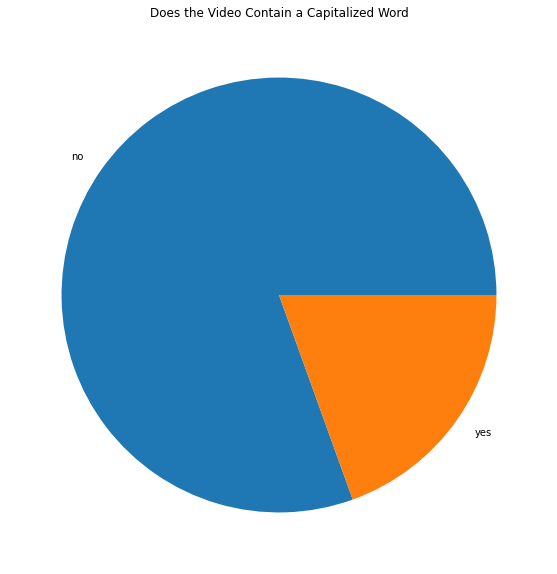

In [11]:
plt.figure(figsize=(10,10))
plt.pie([value_counts[False],value_counts[True]],labels=['no','yes'])
plt.title('Does the Video Contain a Capitalized Word')

In [12]:
df['title_length'] = df['title'].apply(lambda x: len(x))

([<matplotlib.axis.XTick at 0x22a8f3ee2b0>,
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(0, 0, '')])

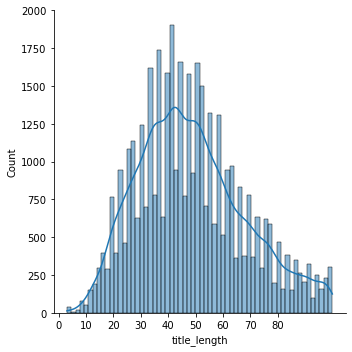

In [59]:
sns.displot(df['title_length'],kde=True,rug=False)
plt.xticks(range(0,90,10))

Text(0, 0.5, 'title_length(characters)')

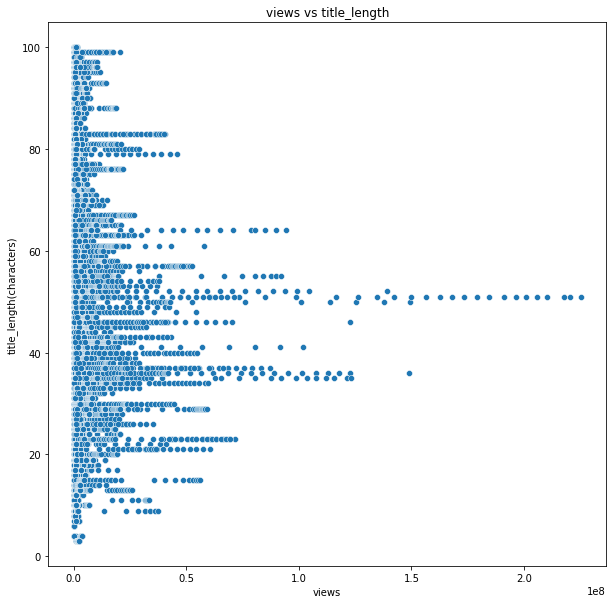

In [66]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['views'], y=df['title_length'],legend='auto')
plt.title('views vs title_length')
plt.ylabel('title_length(characters)')

In [65]:
df['title_length']

0        34
1        62
2        53
3        32
4        24
         ..
40944    28
40945    26
40946    84
40947    35
40948    64
Name: title_length, Length: 40949, dtype: int64

<AxesSubplot:>

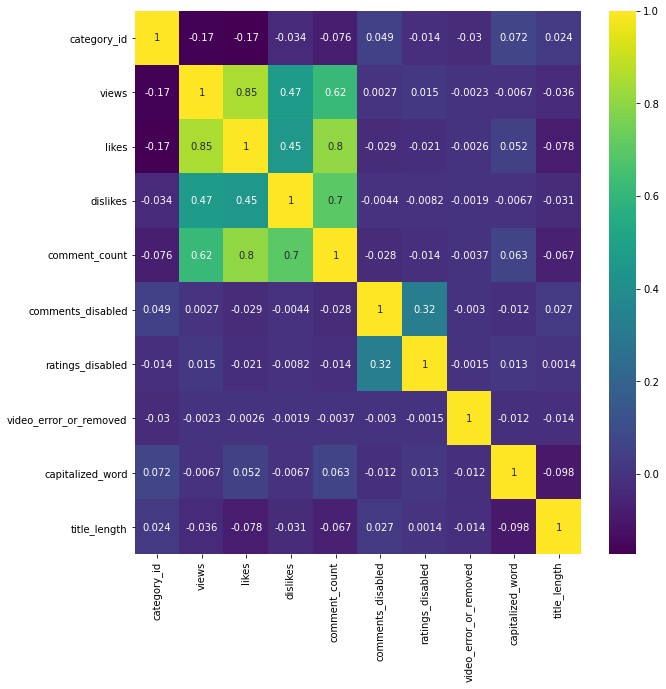

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')